In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import warnings 

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 


#### 0 denotes the tweet is not sexist/racist and 1 denotes the tweet is racist/racist

In [3]:
train = pd.read_csv("dataset/train.csv")

In [4]:
test = pd.read_csv("dataset/test.csv")

In [5]:
train.shape

(31962, 3)

In [6]:
train.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [7]:
train[train['label']==0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [8]:
train[train['label']==1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


In [9]:
train.shape,test.shape

((31962, 3), (17197, 2))

In [10]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite"
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦"


In [11]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [12]:
100*29720/len(train)  #not racist

92.98542018647143

In [13]:
100*2242/len(train) #racist

7.014579813528565

### Now we will check the distribution of length of the tweets, in terms of words, in both train and test data.

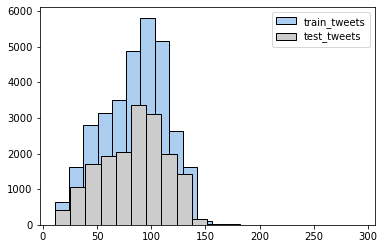

In [14]:
length_train = train['tweet'].str.len() 
length_test = test['tweet'].str.len() 
plt.hist(length_train, bins=20,edgecolor='black', label="train_tweets",color="#abcdef") 
plt.hist(length_test, bins=20,edgecolor='black', label="test_tweets",color="#cccccc") 
plt.legend() 
plt.show()

<hr>

In any natural language processing task, cleaning raw text data is an important step. It helps in getting rid of the unwanted words and characters which helps in obtaining better features. If we skip this step then there is a higher chance that you are working with noisy and inconsistent data. The objective of this step is to clean noise those are less relevant to find the sentiment of tweets such as punctuation, special characters, numbers, and terms which don’t carry much weightage in context to the text.

Before we begin cleaning, let’s first combine train and test datasets. Combining the datasets will make it convenient for us to preprocess the data. Later we will split it back into train and test data.

In [15]:
combi = train.append(test, ignore_index=True) 
combi.shape

(49159, 3)

In [16]:
combi.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation


In [17]:
# Given below is a user-defined function to remove unwanted text patterns from the tweets.

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

We will be following the steps below to clean the raw tweets in out data.

**We will remove the twitter handles as they are already masked as @user due to privacy concerns. These twitter handles hardly give any information about the nature of the tweet.**

**We will also get rid of the punctuations, numbers and even special characters since they wouldn’t help in differentiating different types of tweets.**

**Most of the smaller words do not add much value. For example, ‘pdx’, ‘his’, ‘all’. So, we will try to remove them as well from our data.**

**Lastly, we will normalize the text data. For example, reducing terms like loves, loving, and lovable to their base word, i.e., ‘love’.are often used in the same context. If we can reduce them to their root word, which is ‘love’. It will help in reducing the total number of unique words in our data without losing a significant amount of information.**

<h3 style="color:red">1. Removing Twitter Handles (@user)</h3>

Let’s create a new column tidy_tweet, it will contain the cleaned and processed tweets. Note that we have passed “@[]*” as the pattern to the remove_pattern function. It is actually a regular expression which will pick any word starting with ‘@’.



In [18]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*") 
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


<h3 style="color:gray">2. Removing Punctuations, Numbers, and Special Characters</h3>

Here we will replace everything except characters and hashtags with spaces. The regular expression “[^a-zA-Z#]” means anything except alphabets and ‘#’.

In [19]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ") 
combi.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fan fare and big talking before they leave chaos and pay disputes when they get there #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams can t think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won love the land #allin #cavs #champions #cleveland #clevelandcavaliers
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here i m it s so #gr


<h3 style="color:purple">3. Removing Short Words</h3>

We have to be a little careful here in selecting the length of the words which we want to remove. So, I have decided to remove all the words having length 3 or less. For example, terms like “hmm”, “oh” are of very little use. It is better to get rid of them.

In [20]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [21]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


<h3 style="color:darkred">4. Text Normalization</h3>

Here we will use nltk’s PorterStemmer() function to normalize the tweets. But before that we will have to tokenize the tweets. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

In [22]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing 
tokenized_tweet.head()

0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [23]:
#Now we can normalize the tokenized tweets.

from nltk.stem.porter import * 
stemmer = PorterStemmer() 
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [24]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])    
combi['tidy_tweet'] = tokenized_tweet

In [25]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunct selfish drag kid into dysfunct #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thank #lyft credit caus they offer wheelchair van #disapoint #getthank
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


<hr style="color:gray">
In this section, we will explore the cleaned tweets. Exploring and visualizing data, no matter whether its text or any other data, is an essential step in gaining insights.

Before we begin exploration, we must think and ask questions related to the data in hand. A few probable questions are as follows:

**1 What are the most common words in the entire dataset?**<br>
**2 What are the most common words in the dataset for negative and positive tweets, respectively?**<br>
**3 How many hashtags are there in a tweet?**<br>
**4 Which trends are associated with my dataset?**<br>
**Which trends are associated with either of the sentiments? Are they compatible with the sentiments?**

### A) Understanding the common words used in the tweets: WordCloud

Now I want to see how well the given sentiments are distributed across the train dataset. One way to accomplish this task is by understanding the common words by plotting wordclouds.

A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

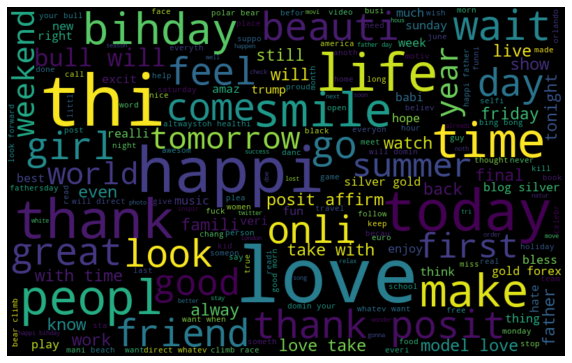

In [26]:
#Let’s visualize all the words in our data using the wordcloud plot.

all_words = ' '.join([text for text in combi['tidy_tweet']]) 
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

We can see most of the words are positive or neutral. Words like love, great, friend, life are the most frequent ones. It doesn’t give us any idea about the words associated with the racist/sexist tweets. Hence, we will plot separate wordclouds for both the classes (racist/sexist or not) in our train data.

<h3>B) Words in non racist/sexist tweets</h3>

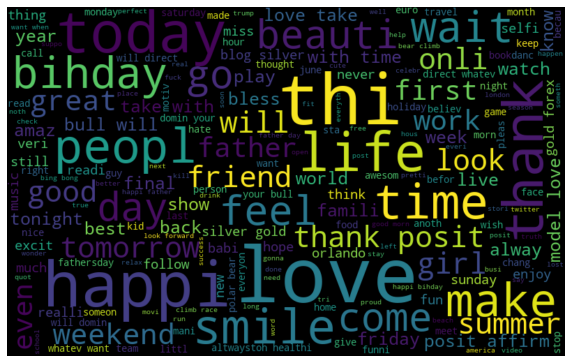

In [27]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

<h3>C) Racist/Sexist Tweets</h3>

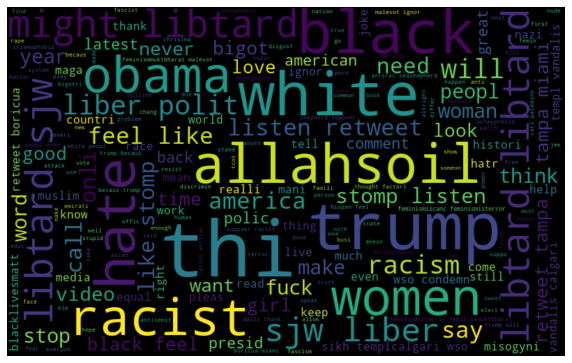

In [28]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label']==1]])
wordcloud = WordCloud(width=800,height=500,max_font_size=110,random_state=21).generate(negative_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

<h3 style='color:blue'>D) Understanding the impact of Hashtags on tweets sentiment</h3>

Hashtags in twitter are synonymous with the ongoing trends on twitter at any particular point in time. We should try to check whether these hashtags add any value to our sentiment analysis task, i.e., they help in distinguishing tweets into the different sentiments.

For instance, given below is a tweet from our dataset:



The tweet seems sexist in nature and the hashtags in the tweet convey the same feeling.

We will store all the trend terms in two separate lists — one for non-racist/sexist tweets and the other for racist/sexist tweets.

In [29]:
# function to collect hashtags 
def hashtag_extract(x):    
    hashtags = []    # Loop over the words in the tweet    
    for i in x:        
        ht = re.findall(r"#(\w+)", i)        
        hashtags.append(ht)     
    return hashtags


In [30]:
# extracting hashtags from non racist/sexist tweets 
HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1]) 

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

In [31]:
print(HT_regular)

['run', 'lyft', 'disapoint', 'getthank', 'model', 'motiv', 'allshowandnogo', 'school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl', 'allin', 'cav', 'champion', 'cleveland', 'clevelandcavali', 'ireland', 'blog', 'silver', 'gold', 'forex', 'orlando', 'standwithorlando', 'pulseshoot', 'orlandoshoot', 'biggerproblem', 'selfish', 'heabreak', 'valu', 'love', 'gettingf', 'got', 'junior', 'yugyoem', 'omg', 'thank', 'posit', 'friday', 'cooki', 'euro', 'badday', 'coneofsham', 'cat', 'piss', 'funni', 'laugh', 'wine', 'weekend', 'tgif', 'gamedev', 'indiedev', 'indiegamedev', 'squad', 'upsideofflorida', 'shopalyssa', 'love', 'smile', 'media', 'pressconfer', 'antalya', 'turkey', 'throwback', 'ica', 'rip', 'orlando', 'alohafriday', 'time', 'not', 'exist', 'positivevib', 'hawaiian', 'goodnight', 'badmonday', 'taylorswift', 'travelingram', 'dalat', 'ripinkylif', 'photoshop', 'enoughisenough', 'dontphotoshopeveryth', 'wheresallthenaturalphoto', 'cedarpoint', 'thank', 'posit', 'book

<hr>
Now that we have prepared our lists of hashtags for both the sentiments, we can plot the top ‘n’ hashtags. So, first let’s check the hashtags in the non-racist/sexist tweets.

<h2>Non-Racist Tweets<h2>

In [32]:
abc = nltk.FreqDist(HT_regular)
abc

FreqDist({'love': 1654, 'posit': 917, 'smile': 676, 'healthi': 573, 'thank': 534, 'fun': 463, 'life': 425, 'affirm': 423, 'summer': 390, 'model': 375, ...})

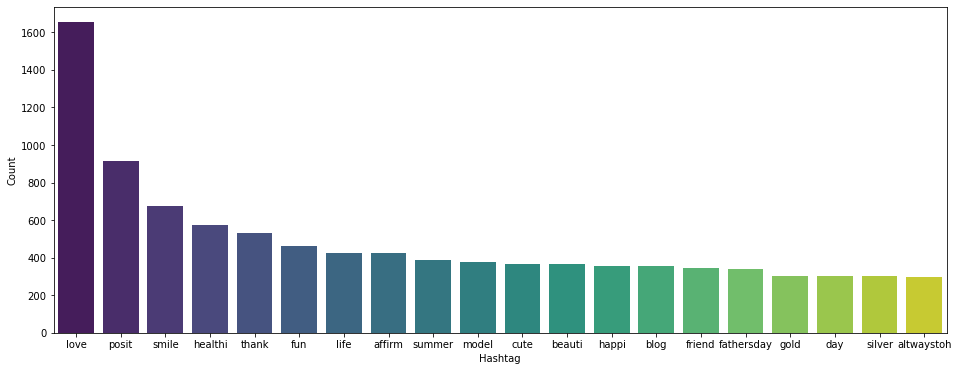

In [33]:
a = nltk.FreqDist(HT_regular) 
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())}) 
# selecting top 20 most frequent hashtags
d = d.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,6))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count",palette="viridis")
ax.set(ylabel = 'Count') 
plt.show()

All these hashtags are positive and it makes sense. I am expecting negative terms in the plot of the second list. Let’s check the most frequent hashtags appearing in the racist/sexist tweets.

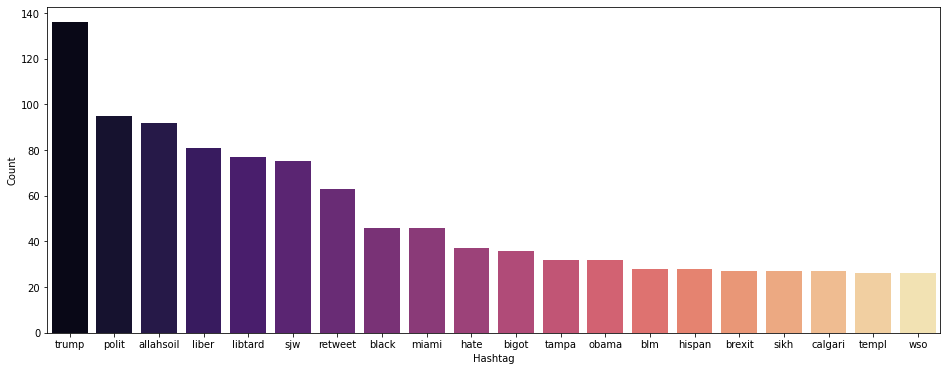

In [34]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag' : list(b.keys()), 'Count' : list(b.values())})

#selecting top 20 most frequent hashtags
e = e.nlargest(20, 'Count')
plt.figure(figsize=(16,6))
ax = sns.barplot(x = 'Hashtag', y = 'Count', data = e,palette='magma')
ax.set_ylabel("Count")
plt.show()

As expected, most of the terms are negative with a few neutral terms as well. So, it’s not a bad idea to keep these hashtags in our data as they contain useful information. Next, we will try to extract features from the tokenized tweets.

<hr style='color:blue'>
To analyse a preprocessed data, it needs to be converted into features. Depending upon the usage, text features can be constructed using assorted techniques – Bag of Words, TF-IDF, and Word Embeddings. Read on to understand these techniques in detail.

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim

C:\Users\HP\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


Let’s start with the Bag-of-Words Features.

Consider a Corpus C of D documents {d1,d2…..dD} and N unique tokens extracted out of the corpus C. The N tokens (words) will form a dictionary and the size of the bag-of-words matrix M will be given by D X N. Each row in the matrix M contains the frequency of tokens in document D(i).

In [36]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english') 
bow = bow_vectorizer.fit_transform(combi['tidy_tweet']) 
bow.shape

(49159, 1000)

There is another method which is based on the frequency method but it is different to the bag-of-words approach in the sense that it takes into account not just the occurrence of a word in a single document (or tweet) but in the entire corpus.

TF-IDF works by penalising the common words by assigning them lower weights while giving importance to words which are rare in the entire corpus but appear in good numbers in few documents.

Let’s have a look at the important terms related to TF-IDF:

1. TF = (Number of times term t appears in a document)/(Number of terms in the document)

2. IDF = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in.

3. TF-IDF = TF*IDF

In [37]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
tfidf.shape

(49159, 1000)

**Word embeddings** are the modern way of representing words as vectors. The objective of word embeddings is to redefine the high dimensional word features into low dimensional feature vectors by preserving the contextual similarity in the corpus. They are able to achieve tasks like King -man +woman = Queen, which is mind-blowing.



The advantages of using word embeddings over BOW or TF-IDF are:

1. Dimensionality reduction - significant reduction in the no. of features required to build a model.

2. It capture meanings of the words, semantic relationships and the different types of contexts they are used in.

<h3>1. Word2Vec Embeddings</h3>

Word2Vec is not a single algorithm but a combination of two techniques – CBOW (Continuous bag of words) and Skip-gram model. Both of these are shallow neural networks which map word(s) to the target variable which is also a word(s). Both of these techniques learn weights which act as word vector representations.

CBOW tends to predict the probability of a word given a context. A context may be a single adjacent word or a group of surrounding words. The Skip-gram model works in the reverse manner, it tries to predict the context for a given word.

There are three layers: - an input layer, - a hidden layer, and - an output layer.

The input layer and the output, both are one- hot encoded of size [1 X V], where V is the size of the vocabulary (no. of unique words in the corpus). The output layer is a softmax layer which is used to sum the probabilities obtained in the output layer to 1. The weights learned by the model are then used as the word-vectors.

We will go ahead with the Skip-gram model as it has the following advantages:

1. It can capture two semantics for a single word. i.e it will have two vector representations of ‘apple’. One for the company Apple and the other for the fruit.

2. Skip-gram with negative sub-sampling outperforms CBOW generally.

We will train a Word2Vec model on our data to obtain vector representations for all the unique words present in our corpus. There is one more option of using pre-trained word vectors instead of training our own model. Some of the freely available pre-trained vectors are:

<ul>
    <li>Google News Word Vectors</li>
    <li>Freebase names</li>
    <li>DBPedia vectors (wiki2vec)</li>
 </ul>





In [38]:
# Let’s train a Word2Vec model on our corpus.

tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing 
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34) 

model_w2v.train(tokenized_tweet, total_examples= len(combi['tidy_tweet']), epochs=20)

(6511401, 7536020)

Let’s play a bit with our Word2Vec model and see how does it perform. We will specify a word and the model will pull out the most similar words from the corpus.

In [39]:
model_w2v.most_similar(positive='dinner')

[('cookout', 0.5659958124160767),
 ('spaghetti', 0.5506831407546997),
 ('#cellar', 0.5497087240219116),
 ('#biall', 0.5487759113311768),
 ('dess', 0.5456699132919312),
 ('spinach', 0.5401471853256226),
 ('noodl', 0.535896897315979),
 ('#toast', 0.5348002314567566),
 ('fav', 0.5314875841140747),
 ('melani', 0.5268102884292603)]

In [40]:
model_w2v.most_similar(positive='trump')

[('phoni', 0.5321087837219238),
 ('jibe', 0.5309206247329712),
 ('endors', 0.5297248363494873),
 ('donald', 0.5256507396697998),
 ('hillari', 0.5193251371383667),
 ('#delegaterevolt', 0.5186384320259094),
 ('unstabl', 0.5185192823410034),
 ('unfavor', 0.5174897909164429),
 ('tomlin', 0.5173009037971497),
 ('melo', 0.51624596118927)]

From the above two examples, we can see that our word2vec model does a good job of finding the most similar words for a given word. But how is it able to do so? That’s because it has learned vectors for every unique word in our data and it uses cosine similarity to find out the most similar vectors (words).

In [41]:
# Let’s check the vector representation of any word from our corpus.
model_w2v['food']

array([-2.71663964e-01,  2.21409336e-01,  4.05814081e-01, -1.01985705e+00,
       -8.25383291e-02,  5.03069460e-02, -4.25044864e-01, -2.71901160e-01,
       -4.63204533e-01, -8.02332312e-02,  1.56435259e-02, -3.37603278e-02,
        3.67306471e-01, -4.04263526e-01, -2.24354386e-01, -2.71654397e-01,
       -4.49026316e-01,  2.33097211e-01, -4.24552448e-02, -3.08365852e-01,
        1.19259870e+00, -3.70790124e-01, -2.14716092e-01,  1.34494975e-01,
       -3.06114435e-01,  1.54483274e-01,  5.96593976e-01, -3.05156469e-01,
        1.95486277e-01,  6.58333659e-01,  4.19261485e-01, -3.37456353e-02,
        4.91846710e-01, -1.37082919e-01, -1.29344687e-01, -2.63438206e-02,
        1.57263428e-01,  1.39730066e-01, -2.97882527e-01, -3.36289406e-01,
        3.28505635e-01, -2.26837955e-02,  3.98126572e-01, -1.36665225e-01,
       -1.39616206e-01,  8.31475407e-02, -1.07386656e-01,  2.02758983e-01,
       -1.21435240e-01,  3.39414805e-01,  2.46126428e-01, -1.64345577e-02,
       -8.15912306e-01, -

In [42]:
len(model_w2v['food']) #The length of the vector is 200

200

<h4>Preparing Vectors for Tweets</h4>

Since our data contains tweets and not just words, we’ll have to figure out a way to use the word vectors from word2vec model to create vector representation for an entire tweet. There is a simple solution to this problem, we can simply take mean of all the word vectors present in the tweet. The length of the resultant vector will be the same, i.e. 200. We will repeat the same process for all the tweets in our data and obtain their vectors. Now we have 200 word2vec features for our data.

In [43]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary                                     
            continue
    if count != 0:
        vec /= count
    return vec

In [44]:
# Preparing word2vec feature set…

wordvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    wordvec_df = pd.DataFrame(wordvec_arrays)
    
wordvec_df.shape   

(49159, 200)

<h3>2. Doc2Vec Embedding</h3>

Doc2Vec model is an unsupervised algorithm to generate vectors for sentence/paragraphs/documents. This approach is an extension of the word2vec. The major difference between the two is that doc2vec provides an additional context which is unique for every document in the corpus. This additional context is nothing but another feature vector for the whole document. This document vector is trained along with the word vectors.

In [45]:
from tqdm import tqdm  
tqdm.pandas(desc="progress-bar") 
from gensim.models.doc2vec import LabeledSentence

To implement doc2vec, we have to labelise or tag each tokenised tweet with unique IDs. We can do so by using Gensim’s LabeledSentence() function.

In [46]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

In [47]:
labeled_tweets = add_label(tokenized_tweet) # label all the tweets

In [48]:
labeled_tweets[:5]

[LabeledSentence(words=['when', 'father', 'dysfunct', 'selfish', 'drag', 'kid', 'into', 'dysfunct', '#run'], tags=['tweet_0']),
 LabeledSentence(words=['thank', '#lyft', 'credit', 'caus', 'they', 'offer', 'wheelchair', 'van', '#disapoint', '#getthank'], tags=['tweet_1']),
 LabeledSentence(words=['bihday', 'your', 'majesti'], tags=['tweet_2']),
 LabeledSentence(words=['#model', 'love', 'take', 'with', 'time'], tags=['tweet_3']),
 LabeledSentence(words=['factsguid', 'societi', '#motiv'], tags=['tweet_4'])]

In [49]:
# Now let’s train a doc2vec model.

model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model                                   
dm_mean=1, # dm = 1 for using mean of the context word vectors                                  
size=200, # no. of desired features                                  
window=5, # width of the context window                                  
negative=7, # if > 0 then negative sampling will be used                                 
min_count=5, # Ignores all words with total frequency lower than 5.                                  
workers=3, # no. of cores                                  
alpha=0.1, # learning rate                                  
seed = 23) 

model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])

C:\Users\HP\Anaconda3\lib\site-packages\gensim\models\doc2vec.py:366: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
100%|████████████████████████████████████████████████████████████████████████| 49159/49159 [00:00<00:00, 879404.39it/s]


In [50]:
model_d2v.train(labeled_tweets, total_examples= len(combi['tidy_tweet']), epochs=15)

In [51]:
#Preparing doc2vec Feature Set

docvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(combi)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))    

docvec_df = pd.DataFrame(docvec_arrays) 
docvec_df.shape

(49159, 200)

<h3>Logistic Regression</h3>

In [52]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score,accuracy_score,classification_report,confusion_matrix


<h3>Bag-of-Words Features</h3>

We will first try to fit the logistic regression model on the Bag-of_Words (BoW) features.

In [53]:
# Extracting train and test BoW features 
train_bow = bow[:31962,:] 
test_bow = bow[31962:,:] 
# splitting data into training and validation set 
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'],random_state=42, test_size=0.3)

In [54]:
regressor = LogisticRegression()
regressor.fit(xtrain_bow,ytrain)

LogisticRegression()

In [55]:
y_pred = regressor.predict_proba(xvalid_bow)

In [56]:
# predicting on the validation set
prediction_int = y_pred[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int) # calculating f1 score for the validation set


0.5295587010824313

In [57]:
accuracy_score(yvalid,prediction_int)

0.941078318907081

In [58]:
print(classification_report(yvalid,prediction_int))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8905
           1       0.62      0.46      0.53       684

    accuracy                           0.94      9589
   macro avg       0.79      0.72      0.75      9589
weighted avg       0.94      0.94      0.94      9589



In [59]:
confusion_matrix(yvalid,prediction_int)

array([[8706,  199],
       [ 366,  318]], dtype=int64)

In [60]:
#Now let’s make predictions for the test dataset and create a submission file.

test_pred = regressor.predict_proba(test_bow) 
test_pred_int = test_pred[:,1] >= 0.3 
test_pred_int = test_pred_int.astype(np.int) 
test['label'] = test_pred_int 
submission = test[['id','label']] 
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file

<h3>TF-IDF Features</h3>

We’ll follow the same steps as above, but now for the TF-IDF feature set.

In [61]:
train_tfidf = tfidf[:31962,:] 
test_tfidf = tfidf[31962:,:] 
xtrain_tfidf = train_tfidf[ytrain.index] 
xvalid_tfidf = train_tfidf[yvalid.index]

In [62]:
regressor.fit(xtrain_tfidf, ytrain) 


LogisticRegression()

In [63]:
prediction = regressor.predict_proba(xvalid_tfidf) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int) # calculating f1 score for the validation set

0.5478723404255319

In [64]:
print(classification_report(yvalid,prediction_int))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8905
           1       0.70      0.45      0.55       684

    accuracy                           0.95      9589
   macro avg       0.83      0.72      0.76      9589
weighted avg       0.94      0.95      0.94      9589



<h3> Word2Vec Features</h3>

In [65]:
train_w2v = wordvec_df.iloc[:31962,:] 
test_w2v = wordvec_df.iloc[31962:,:] 
xtrain_w2v = train_w2v.iloc[ytrain.index,:]
xvalid_w2v = train_w2v.iloc[yvalid.index,:]

In [66]:
regressor.fit(xtrain_w2v, ytrain) 
prediction = regressor.predict_proba(xvalid_w2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.6335311572700296

In [67]:
print(classification_report(yvalid,prediction_int))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8905
           1       0.64      0.62      0.63       684

    accuracy                           0.95      9589
   macro avg       0.81      0.80      0.80      9589
weighted avg       0.95      0.95      0.95      9589



### Doc2Vec Features

In [68]:
train_d2v = docvec_df.iloc[:31962,:] 
test_d2v = docvec_df.iloc[31962:,:] 
xtrain_d2v = train_d2v.iloc[ytrain.index,:] 
xvalid_d2v = train_d2v.iloc[yvalid.index,:]


In [69]:
regressor.fit(xtrain_d2v, ytrain) 
prediction = regressor.predict_proba(xvalid_d2v) 
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.3837312113174183

In [70]:
print(classification_report(yvalid,prediction_int))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      8905
           1       0.49      0.32      0.38       684

    accuracy                           0.93      9589
   macro avg       0.72      0.65      0.67      9589
weighted avg       0.92      0.93      0.92      9589



Doc2Vec features do not seem to be capturing the right signals as the f1 score is less

## SVM

In [71]:
from sklearn.svm import SVC

In [72]:
# Bag-of-Words Features

svc = SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain)
prediction = svc.predict_proba(xvalid_bow) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.5096952908587258

In [73]:
# Again let’s make predictions for the test dataset and create another submission file.

test_pred = svc.predict_proba(test_bow) 
test_pred_int = test_pred[:,1] >= 0.3 
test_pred_int = test_pred_int.astype(np.int) 
test['label'] = test_pred_int 
submission = test[['id','label']] 
submission.to_csv('sub_svm_bow.csv', index=False)

In [74]:
# TF-IDF Features

svc = SVC(kernel='linear',C=1, probability=True)
svc.fit(xtrain_tfidf, ytrain)
prediction = svc.predict_proba(xvalid_tfidf) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.5109489051094891

In [75]:
# Word2Vec Features

svc = SVC(kernel='linear', C=1, probability=True)
svc.fit(xtrain_w2v, ytrain) 
prediction = svc.predict_proba(xvalid_w2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.615625

In [76]:
# Doc2Vec Features

svc = SVC(kernel='linear', C=1, probability=True)
svc.fit(xtrain_d2v, ytrain)


SVC(C=1, kernel='linear', probability=True)

In [77]:
prediction = svc.predict_proba(xvalid_d2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.15233415233415235

## Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
# bag of words

rfc = RandomForestClassifier(n_estimators=400,random_state=0)
rfc.fit(xtrain_bow,ytrain)
prediction = rfc.predict(xvalid_bow)
f1_score(yvalid,prediction)

0.5504731861198738

In [80]:
print(classification_report(yvalid,prediction))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      8905
           1       0.60      0.51      0.55       684

    accuracy                           0.94      9589
   macro avg       0.78      0.74      0.76      9589
weighted avg       0.94      0.94      0.94      9589



In [81]:
# let's make prediction for the test dataset and create another submission file

test_pred = rfc.predict(test_bow) 
test['label'] = test_pred 
submission = test[['id','label']] 
submission.to_csv('sub_rf_bow.csv', index=False)

In [82]:
# TF-IDF Features

rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_tfidf, ytrain) 
prediction = rf.predict(xvalid_tfidf) 
f1_score(yvalid, prediction)

0.5632502308402585

In [83]:
# Word2Vec Features

rf = RandomForestClassifier(n_estimators=400, random_state=11)
rf.fit(xtrain_w2v, ytrain) 

RandomForestClassifier(n_estimators=400, random_state=11)

In [84]:
prediction = rf.predict(xvalid_w2v) 
f1_score(yvalid, prediction)

0.5048543689320388

In [86]:
rf = RandomForestClassifier(n_estimators=400, random_state=11)
rf.fit(xtrain_d2v, ytrain) 
prediction = rf.predict(xvalid_d2v) 
f1_score(yvalid, prediction)

0.06779661016949151

## XGBoost

Extreme Gradient Boosting (xgboost) is an advanced implementation of gradient boosting algorithm. It has both linear model solver and tree learning algorithms. Its ability to do parallel computation on a single machine makes it extremely fast. It also has additional features for doing cross validation and finding important variables. There are many parameters which need to be controlled to optimize the model.

Some key benefits of XGBoost are:

1. Regularization - helps in reducing overfitting

2. Parallel Processing - XGBoost implements parallel processing and is blazingly faster as compared to GBM.

3. Handling Missing Values - It has an in-built routine to handle missing values.

4. Built-in Cross-Validation - allows user to run a cross-validation at each iteration of the boosting process

In [88]:
from xgboost import XGBClassifier

In [89]:
# Bag-of-Words Features

xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_bow, ytrain) 
prediction = xgb_model.predict(xvalid_bow) 
f1_score(yvalid, prediction)

0.5266055045871559

In [90]:
test_pred = xgb_model.predict(test_bow) 
test['label'] = test_pred 
submission = test[['id','label']] 
submission.to_csv('sub_xgb_bow.csv', index=False)

In [91]:
# TF-IDF Features

xgb = XGBClassifier(max_depth=6, n_estimators=1000)
xgb.fit(xtrain_tfidf, ytrain)
prediction = xgb.predict(xvalid_tfidf) 
f1_score(yvalid, prediction)

0.5392245266005409

In [92]:
# Word2Vec Features

xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3)
xgb.fit(xtrain_w2v, ytrain) 
prediction = xgb.predict(xvalid_w2v) 
f1_score(yvalid, prediction)

0.6488888888888888

XGBoost model on word2vec features has outperformed all the previuos models

In [94]:
# Doc2Vec Features

xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3)

In [95]:
xgb.fit(xtrain_d2v, ytrain) 


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=3, nthread=3, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [96]:
prediction = xgb.predict(xvalid_d2v) 
f1_score(yvalid, prediction)

0.35565312843029634